<a href="https://colab.research.google.com/github/Rob192/verbatim/blob/master/verbatim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Rob192/verbatim/master/sondage.csv', sep= ';')

In [0]:
col = ["mess_min", 
        "mess_autre",
        "instant_min",
        "instant_autre",
        "visio_min",
        "visio_intermin",
        "visio_autre",
        "collab_min",
        "collab_intermin",
        "collab_autre",
        'audio']

In [0]:
df.columns = col

In [18]:
df.head()

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
0,Tres utile,Pas utile,Non utilise,Non utilise,Non utilise,Non utilise,Utile,Non utilise,Non utilise,Utile,Tres utile
1,Tres utile,Utile,Non utilise,Utile,Non utilise,Non utilise,Utile,Non utilise,Non utilise,Utile,Tres utile
2,Tres utile,Pas utile,Inconnu,Tres utile,Non utilise,Non utilise,Tres utile,Non utilise,Inconnu,Non utilise,Tres utile
3,Non utilise,Non utilise,Non utilise,Non utilise,Non utilise,Non utilise,Tres utile,Non utilise,Non utilise,Tres utile,Tres utile
4,Tres utile,Non utilise,Non utilise,Tres utile,Non utilise,Pas utile,Tres utile,Inconnu,Inconnu,Tres utile,Tres utile


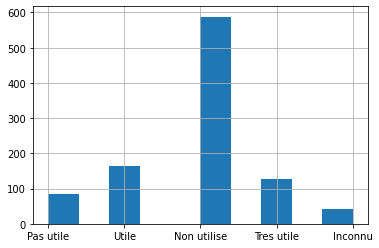

In [19]:
df.mess_autre.hist()

# Les outils du ministère sont-il préférés aux autres outils ?


## Donnons des notes aux commentaires

In [20]:
def give_grade (comment):
  grades = {"Tres utile":2,"Utile":1,"Non utilise":0,"Pas utile":-1, "Inconnu":0}
  return grades[comment]
# Apply on every columns 
for c in col:
  df[c+"_grade"] = df[c].apply(lambda x: give_grade(x))

2

In [0]:
data = {"mess_min_vs_autre": df.mess_min_grade - df.mess_autre_grade,
        "instant_min_vs_autre": df.instant_min_grade - df.instant_autre_grade,
        "visio_min_vs_autre": df.visio_min_grade - df.visio_autre_grade,
        "visio_min_vs_intermin": df.visio_min_grade - df.visio_intermin_grade,
        "collab_min_vs_autre": df.collab_min_grade - df.collab_autre_grade,
        "collab_min_vs_intermin": df.collab_min_grade - df.collab_intermin_grade,
        }
df_comparison = pd.DataFrame()
df_comparison = df_comparison.from_dict(data)

In [0]:
def give_grade (comment):
  grades = {"Tres utile":2,"Utile":1,"Non utilise":np.nan,"Pas utile":0, "Inconnu":np.nan}
  return grades[comment]
# Apply on every columns 
for c in col:
  df[c+"_grade2"] = df[c].apply(lambda x: give_grade(x))

In [84]:
data = {"mess_min_vs_autre": df.mess_min_grade2 - df.mess_autre_grade2,
        "instant_min_vs_autre": df.instant_min_grade2 - df.instant_autre_grade2,
        "visio_min_vs_autre": df.visio_min_grade2 - df.visio_autre_grade2,
        "visio_min_vs_intermin": df.visio_min_grade2 - df.visio_intermin_grade2,
        "collab_min_vs_autre": df.collab_min_grade2 - df.collab_autre_grade2,
        "collab_min_vs_intermin": df.collab_min_grade2 - df.collab_intermin_grade2,
        }
df_comparison2 = pd.DataFrame()
df_comparison2 = df_comparison.from_dict(data)

,mess_min_vs_autre,instant_min_vs_autre,visio_min_vs_autre,visio_min_vs_intermin,collab_min_vs_autre,collab_min_vs_intermin
0,2.0,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


## Représentation en histogramme

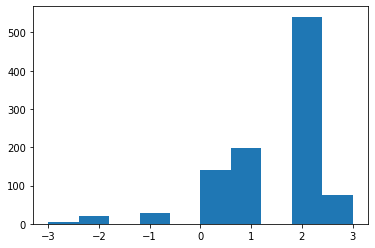

In [27]:
plt.hist(df.mess_min_grade - df.mess_autre_grade)
plt.show()

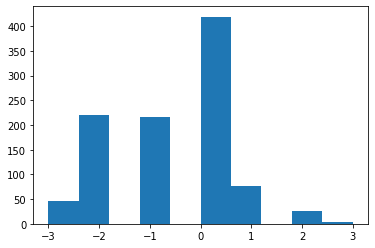

In [28]:
plt.hist(df.instant_min_grade - df.instant_autre_grade)
plt.show()

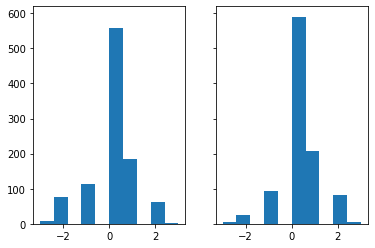

In [33]:
fix, ax = plt.subplots(1,2, sharey= True)
ax[0].hist(df.collab_min_grade - df.collab_autre_grade)
ax[1].hist(df.collab_min_grade - df.collab_intermin_grade)
plt.show()

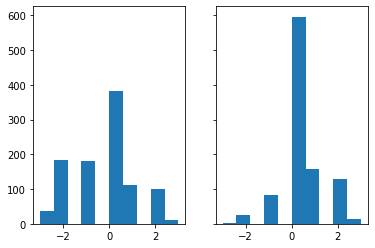

In [34]:
fix, ax = plt.subplots(1,2, sharey= True)
ax[0].hist(df.visio_min_grade - df.visio_autre_grade)
ax[1].hist(df.visio_min_grade - df.visio_intermin_grade)
plt.show()

## Représentation en box plot 

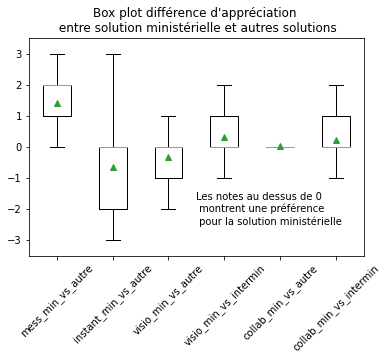

In [107]:
def show_box_plot (df_comparison):
  data = [df_comparison[col].values for col in df_comparison.columns]
  data = [d[~np.isnan(d)] for d in data]
  plt.boxplot(data, showmeans=True, showfliers = False)
  plt.xticks([i+1 for i in range (len(data))],df_comparison.columns.tolist(), rotation = 45)
  plt.title("Box plot différence d'appréciation \n entre solution ministérielle et autres solutions")
  plt.text(3.5,-2.5,"Les notes au dessus de 0 \n montrent une préférence\n pour la solution ministérielle")
  plt.ylim(-3.5,3.5)
  plt.show()
show_box_plot(df_comparison)

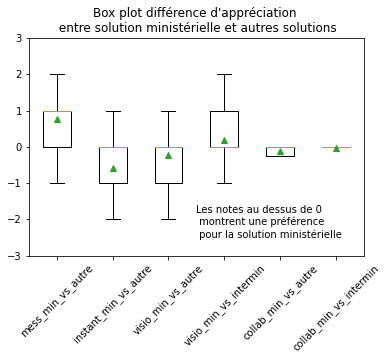

In [106]:
show_box_plot(df_comparison2)

# Les outils du ministère sont-ils connus ? 

In [131]:
counts = df[col].apply(pd.value_counts)
counts

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
Inconnu,17,42,135,28,118,140,31,201,358,232,14
Non utilise,35,588,574,376,427,556,391,392,438,462,81
Pas utile,15,85,120,66,68,93,36,52,47,29,12
Tres utile,830,127,45,292,198,82,327,97,59,124,731
Utile,109,164,132,244,195,135,221,264,104,159,168


In [0]:
cols = counts.columns
ratio = pd.DataFrame()
for c in cols:
  ratio[c] = counts[c] / counts[c].sum() * 100

In [133]:
ratio

,mess_min,mess_autre,instant_min,instant_autre,visio_min,visio_intermin,visio_autre,collab_min,collab_intermin,collab_autre,audio
Inconnu,1.689861,4.174950,13.419483,2.783300,11.729622,13.916501,3.081511,19.980119,35.586481,23.061630,1.391650
Non utilise,3.479125,58.449304,57.057654,37.375746,42.445328,55.268390,38.866799,38.966203,43.538767,45.924453,8.051690
Pas utile,1.491054,8.449304,11.928429,6.560636,6.759443,9.244533,3.578529,5.168986,4.671968,2.882704,1.192843
Tres utile,82.504970,12.624254,4.473161,29.025845,19.681909,8.151093,32.504970,9.642147,5.864811,12.326044,72.664016
Utile,10.834990,16.302187,13.121272,24.254473,19.383698,13.419483,21.968191,26.242545,10.337972,15.805169,16.699801


In [0]:
ratio_copy = ratio.copy()

In [148]:
ratio = ratio.T
ratio

,Inconnu,Non utilise,Pas utile,Tres utile,Utile
mess_min,1.689861,3.479125,1.491054,82.504970,10.834990
mess_autre,4.174950,58.449304,8.449304,12.624254,16.302187
instant_min,13.419483,57.057654,11.928429,4.473161,13.121272
instant_autre,2.783300,37.375746,6.560636,29.025845,24.254473
visio_min,11.729622,42.445328,6.759443,19.681909,19.383698
visio_intermin,13.916501,55.268390,9.244533,8.151093,13.419483
visio_autre,3.081511,38.866799,3.578529,32.504970,21.968191
collab_min,19.980119,38.966203,5.168986,9.642147,26.242545
collab_intermin,35.586481,43.538767,4.671968,5.864811,10.337972
collab_autre,23.061630,45.924453,2.882704,12.326044,15.805169


In [151]:
ratio.index.to_list()

['mess_min',
 'mess_autre',
 'instant_min',
 'instant_autre',
 'visio_min',
 'visio_intermin',
 'visio_autre',
 'collab_min',
 'collab_intermin',
 'collab_autre',
 'audio']

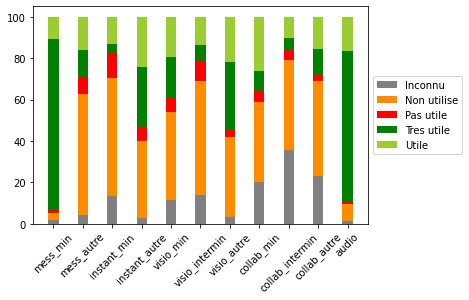

In [154]:
cols = ratio.columns
fig, ax = plt.subplots()
labels = ratio.index.to_list()
width = 0.35     # the width of the bars: can also be len(x) sequence

color_dict = {'Inconnu':'grey',
    'Non utilise':'darkorange',
 'Pas utile': 'red',
 'Utile':'yellowgreen',
 'Tres utile':'green'}

bot = np.zeros(ratio.shape[0])
for n in cols:
    m = n
    ax.bar(labels, ratio[m], width, bottom = bot, label=n , color = color_dict[n])
    bot += ratio[m]


#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.show()